In [31]:
import numpy as np
from tqdm import tqdm
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import initializers
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

L'objectif de ce projet est d'être capable, à partir d'une photo d'une chaussure d'identifier si il s'agit d'une sandale, d'une botte ou d'une chaussure en utilisant un reseau neuronal convolutionnel.

100%|██████████| 500/500 [00:01<00:00, 424.67it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


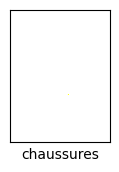

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


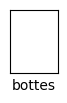

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


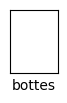

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


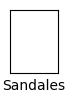

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


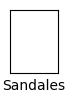

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


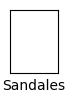

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


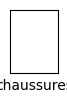

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


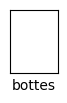

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


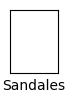

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


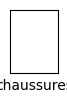

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


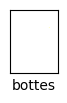

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


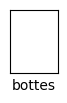

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


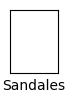

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


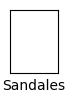

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


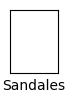

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


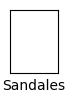

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


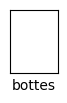

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


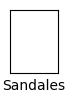

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


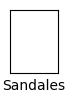

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


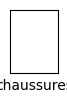

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


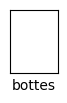

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


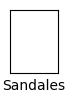

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


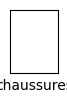

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


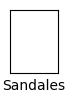

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


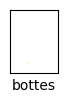

In [32]:
# Définir les dimensions des images
image_width = 102
image_height = 136
dim= (102,136)
#définition des labels

classNames = ['Sandales','chaussures','bottes']
trainPath = "Shoe vs Sandal vs Boot Dataset"
testPath = "Test"

def loadData():
    datasets= [trainPath,testPath]
    images = []
    labels = []

    for dataset in datasets:
        for folder in os.listdir(dataset):
            if folder in 'Boot': label= 0
            elif folder in 'Sandal': label = 1
            elif folder in 'Shoe': label = 2
            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
                imagePath = os.path.join(os.path.join(dataset,folder),file)
                
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,dim)
                images.append(image)
                labels.append(label)

    images = np.array(images,dtype='float32')
    labels =np.array(labels,dtype='int32')
    return images, labels


images,labels = loadData() 


shuffle(images,labels, random_state=10)

trainImages , testImages , trainLabels, testLabels = train_test_split(images,labels,test_size = 0.2)

def displayExamples(images,labels):
    fig= plt.figure(figsize= (10,10))
    fig.suptitle("25 premières images du dataset")
    for i in range (25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classNames[labels[i]])
        plt.show()
# Créer le modèle

displayExamples(trainImages,trainLabels)

In [ ]:
model = Sequential()

# Couches convolutives
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Couches denses
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))